[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 104.96058377242007


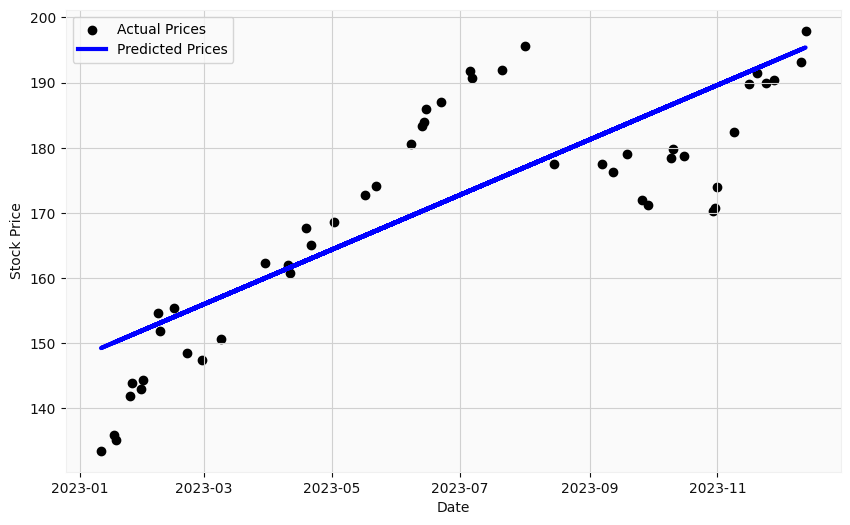

In [63]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to fetch historical stock data from Yahoo Finance
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to preprocess data and extract features
def preprocess_data(data):
    data['Date'] = data.index
    data['Date'] = data['Date'].astype('int64')# Convert date to Unix timestamp
    return data[['Date', 'Close']]

# Function to split data into training and testing sets
def split_data(data):
    X = data[['Date']]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train a linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to make predictions and evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return predictions, mse

# Function to plot the results
def plot_results(y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.index, y_test, color='black', label='Actual Prices')
    plt.plot(y_test.index, predictions, color='blue', linewidth=3, label='Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main function
def main():
    symbol = 'AAPL'  # Stock symbol (you can change this)
    start_date = '2023-01-01'
    end_date = '2024-01-01'

    # Step 1: Fetch historical stock data
    stock_data = get_stock_data(symbol, start_date, end_date)

    # Step 2: Preprocess data
    processed_data = preprocess_data(stock_data)

    # Step 3: Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(processed_data)

    # Step 4: Train a linear regression model
    model = train_model(X_train, y_train)

    # Step 5: Evaluate the model
    predictions, mse = evaluate_model(model, X_test, y_test)
    print(f'Mean Squared Error: {mse}')

    # Step 6: Plot the results
    plot_results(y_test, predictions)


main()
